k-means

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [55]:
data=pd.read_excel("university.xlsx")

In [56]:
data.head()

,University,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Harvard University,1310,89,22,13,22704,94
1,California Institute of Technology,1415,100,25,6,63575,81
2,Massachusetts Institute of Technology,1260,62,59,9,25026,72
3,Stanford University,1310,76,24,12,31510,88
4,Princeton University,1280,83,33,13,21864,90


In [57]:
data.isnull().sum()

University    0
SAT           0
Top10         0
Accept        0
SFRatio       0
Expenses      0
GradRate      0
dtype: int64

In [58]:
data1=data.iloc[:,1:]
data1.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [59]:
data1.shape

(100, 6)

In [60]:
#scaling
from sklearn.preprocessing import scale,normalize

In [61]:
data_new=scale(data1)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [62]:
data_new

array([[ 6.32860277e-01,  1.50011672e+00, -8.47758804e-01,
        -1.06559813e+00, -1.49953373e+00,  1.21638361e+00],
       [ 2.80231274e+00,  3.69443640e+00, -3.36033168e-01,
        -2.18224287e+00,  1.29812886e+00, -1.28171859e+00],
       [-4.00212326e-01, -3.88594066e+00,  5.46352405e+00,
        -1.70368084e+00, -1.34059041e+00, -3.01117396e+00],
       [ 6.32860277e-01, -1.09317017e+00, -5.06608380e-01,
        -1.22511881e+00, -8.96753843e-01,  6.34133635e-02],
       [ 1.30167148e-02,  3.03215082e-01,  1.02856853e+00,
        -1.06559813e+00, -1.55703261e+00,  4.47736779e-01],
       [ 1.45931836e+00, -4.94719345e-01, -8.47758804e-01,
         1.64625339e+00, -1.56606814e+00, -3.20910052e-01],
       [ 2.49239096e+00,  5.02698689e-01, -3.36033168e-01,
         5.29608650e-01,  4.98073064e-01,  8.32060194e-01],
       [ 1.25270384e+00, -6.94202952e-01, -3.36033168e-01,
        -1.08474061e-01, -1.22169095e+00, -8.97395175e-01],
       [-1.24733186e+00, -8.93686559e-01, -1.530

In [63]:
data_new1=normalize(data_new)

In [64]:
data_new1

array([[ 0.22055772,  0.52280469, -0.29545186, -0.3713709 , -0.52260151,
         0.42392105],
       [ 0.5141654 ,  0.67785131, -0.06165501, -0.40039563,  0.23817932,
        -0.23516838],
       [-0.0521573 , -0.50643163,  0.71202873, -0.22203063, -0.17471121,
        -0.39242847],
       [ 0.31023718, -0.53588769, -0.24834669, -0.6005708 , -0.43960159,
         0.03108614],
       [ 0.00587413,  0.13683375,  0.46416851, -0.48087909, -0.70265178,
         0.20205296],
       [ 0.50475339, -0.171115  , -0.29322534,  0.56941104, -0.54167632,
        -0.11099733],
       [ 0.89250361,  0.18001205, -0.12033057,  0.18964827,  0.17835565,
         0.29795355],
       [ 0.59226243, -0.32821032, -0.1588722 , -0.05128516, -0.57759993,
        -0.42427701],
       [-0.46627801, -0.33407821, -0.57196741,  0.25761056, -0.01480698,
         0.52654288],
       [ 0.2636281 , -0.56631   ,  0.00265096,  0.27436046,  0.04547259,
         0.72968813],
       [-0.68109601,  0.23548741,  0.48182927,  0.

In [65]:
# importing model
from sklearn.cluster import KMeans

In [66]:
model=KMeans(n_clusters=3)

In [67]:
model.fit(data_new1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
model.labels_

array([2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 2, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0])

In [69]:
#convert 1d to 2d
cluster=pd.DataFrame(model.labels_)

In [70]:
cluster.head()

,0
0,2
1,0
2,2
3,2
4,2


In [74]:
#creating a column
data['tire']=cluster
data.head()

,University,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster,tire
0,Harvard University,1310,89,22,13,22704,94,2,2
1,California Institute of Technology,1415,100,25,6,63575,81,0,0
2,Massachusetts Institute of Technology,1260,62,59,9,25026,72,2,2
3,Stanford University,1310,76,24,12,31510,88,2,2
4,Princeton University,1280,83,33,13,21864,90,2,2


In [75]:
#grouping
new=data.groupby('tire')
new

In [76]:
new.mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
tire,,,,,,,
0,1313.366667,81.966667,26.966667,16.600000,57063.833333,85.733333,0
1,1248.633333,79.466667,24.600000,23.533333,50979.733333,92.566667,1
2,1276.925000,82.625000,28.750000,19.100000,30493.975000,85.450000,2


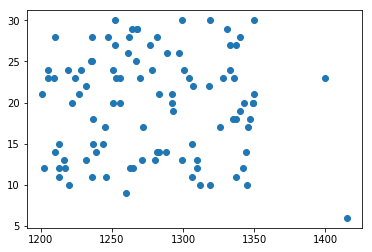

In [77]:
plt.scatter(x=data.SAT,y=data.SFRatio,data=data)

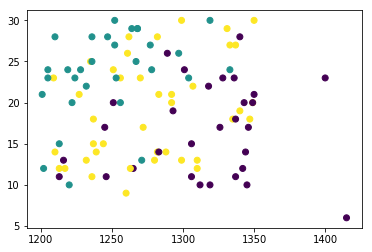

In [78]:
plt.scatter(x=data.SAT,y=data.SFRatio,c=model.labels_)